Implement TG43 calculation of dose proile about an AgX100 I-125 seed used in LDR brachytherapy from data used by the TPS.

Souce model data at http://www.estro.org/about/governance-organisation/committees-activities/tg43-i-125

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
I125 = {'Conversion_factor':1.270, 
        'Dose_rate_constant':1.018,
       'Anisotropy_constant':0.00,
       'Half_life':59.40,
       'Physical_diameter_cm':0.080,
       'Physical_length_cm':0.450,
       'Active_length_cm':0.381}

In [4]:
I125['Active_length_cm']

0.381

In [5]:
data = pd.read_excel('I125_source_model_RC.xlsx', sheetname=None, index_col=0)   # returns a dict of df

In [6]:
for key in data:
    print(key)

Anisotropy_factors
Anisotropy_function
Radial_dose_function


## Explore the data

### Radial_dose_function

In [61]:
fit_order = 5
np_poly_coeffs = np.polyfit(x=data['Radial_dose_function'].index.values, y=data['Radial_dose_function']['Dose_Point'].values, deg=fit_order) # returns the fit coefficients
np_poly_coeffs   # note theye are descending order

array([  8.45194496e-05,  -3.27462190e-03,   4.59763741e-02,
        -2.73896988e-01,   5.18446912e-01,   6.67369129e-01])

In [62]:
TG43_poly_coeffs = [1.01376,
                   1.22747*10**-1,
                   -1.73025*10**-1,
                   4.02378*10**-2,
                   -3.85227*10**-3, 
                   1.34283*10**-4]  # TG43 coeffs for I125 model 6702

TG43_poly_coeffs = TG43_poly_coeffs[::-1]  # reverse the array as required for fit
print(TG43_poly_coeffs)

[0.00013428300000000002, -0.00385227, 0.040237800000000004, -0.173025, 0.12274700000000001, 1.01376]


Plot the polynomial fit with poly1d but note that this takes coeffs in decreasing powers

In [63]:
np_poly_fit = np.poly1d(np_poly_coeffs)  # create the fit finction to my coeffs
TG43_poly_fit = np.poly1d(TG43_poly_coeffs)  # create the fit finction to TG43 coeffs

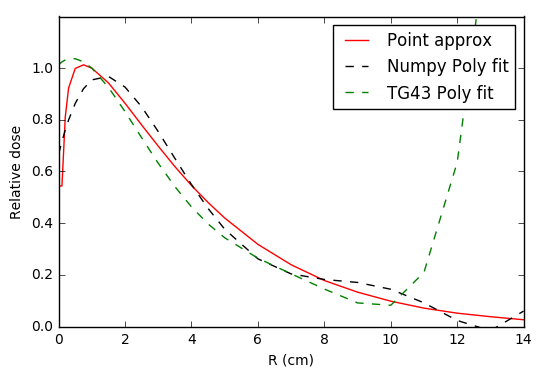

In [64]:
plt.plot(data['Radial_dose_function']['Dose_Point'], c='r',  ls='-', label='Point approx')
#plt.plot(data['Radial_dose_function']['Dose_Line'], c='b',  ls='--', label='Line approx')
plt.plot(r, np_poly_fit(r), c='k', ls='--', label='Numpy Poly fit')
plt.plot(r, TG43_poly_fit(r), c='g', ls='--', label='TG43 Poly fit')
plt.ylim([0,1.2])

plt.ylabel('Relative dose');
plt.xlabel('R (cm)');
plt.legend();

In [66]:
len(r)

24

In [7]:
data['Anisotropy_function']

,0,1,2,3,5,7,10,12,15,20,...,65,70,75,80,85,86,87,88,89,90
r_cm,,,,,,,,,,,,,,,,,,,,,
0.25,0.863,0.865,0.865,0.852,0.784,0.861,0.778,0.747,0.833,0.889,...,0.987,0.989,0.990,0.994,0.998,0.996,1.002,1.001,1.001,1
0.50,0.524,0.517,0.489,0.505,0.668,0.588,0.562,0.570,0.614,0.688,...,0.998,0.973,0.988,0.994,0.998,1.000,0.998,1.000,1.000,1
1.00,0.423,0.425,0.616,0.681,0.599,0.575,0.579,0.597,0.635,0.698,...,0.993,1.005,1.012,0.989,0.998,1.000,1.000,0.998,1.000,1
2.00,0.453,0.597,0.701,0.654,0.611,0.603,0.617,0.635,0.668,0.722,...,0.995,1.002,1.012,1.015,0.994,0.996,0.998,1.000,1.000,1
3.00,0.500,0.675,0.702,0.676,0.637,0.632,0.649,0.668,0.698,0.750,...,1.005,1.011,1.012,1.018,1.023,1.021,1.001,1.002,1.002,1
5.00,0.564,0.710,0.706,0.682,0.657,0.655,0.672,0.687,0.715,0.761,...,0.982,0.995,1.002,1.003,1.011,1.013,1.011,0.999,1.000,1
7.00,0.607,0.725,0.720,0.698,0.682,0.682,0.700,0.716,0.741,0.781,...,0.984,0.998,0.997,1.011,1.005,1.006,1.009,1.009,0.999,1


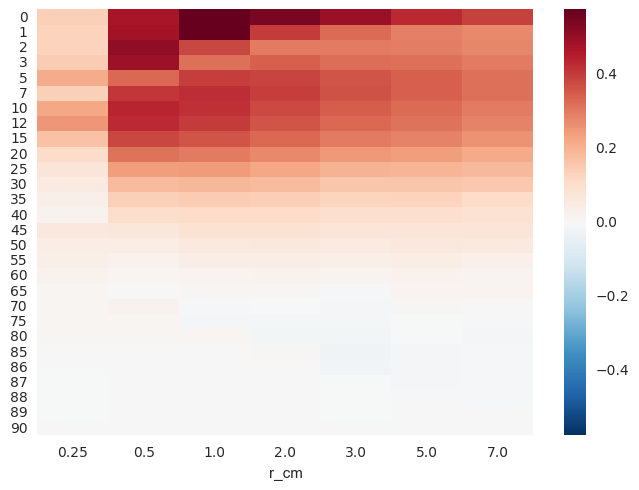

In [8]:
import numpy as np
import seaborn as sns
sns.set()

sns.heatmap(1-data['Anisotropy_function'].T)

Plot the Anisotropy_function at fixed r cm from the seed

In [9]:
data['Anisotropy_function']

,0,1,2,3,5,7,10,12,15,20,...,65,70,75,80,85,86,87,88,89,90
r_cm,,,,,,,,,,,,,,,,,,,,,
0.25,0.863,0.865,0.865,0.852,0.784,0.861,0.778,0.747,0.833,0.889,...,0.987,0.989,0.990,0.994,0.998,0.996,1.002,1.001,1.001,1
0.50,0.524,0.517,0.489,0.505,0.668,0.588,0.562,0.570,0.614,0.688,...,0.998,0.973,0.988,0.994,0.998,1.000,0.998,1.000,1.000,1
1.00,0.423,0.425,0.616,0.681,0.599,0.575,0.579,0.597,0.635,0.698,...,0.993,1.005,1.012,0.989,0.998,1.000,1.000,0.998,1.000,1
2.00,0.453,0.597,0.701,0.654,0.611,0.603,0.617,0.635,0.668,0.722,...,0.995,1.002,1.012,1.015,0.994,0.996,0.998,1.000,1.000,1
3.00,0.500,0.675,0.702,0.676,0.637,0.632,0.649,0.668,0.698,0.750,...,1.005,1.011,1.012,1.018,1.023,1.021,1.001,1.002,1.002,1
5.00,0.564,0.710,0.706,0.682,0.657,0.655,0.672,0.687,0.715,0.761,...,0.982,0.995,1.002,1.003,1.011,1.013,1.011,0.999,1.000,1
7.00,0.607,0.725,0.720,0.698,0.682,0.682,0.700,0.716,0.741,0.781,...,0.984,0.998,0.997,1.011,1.005,1.006,1.009,1.009,0.999,1


At radius of 1.0


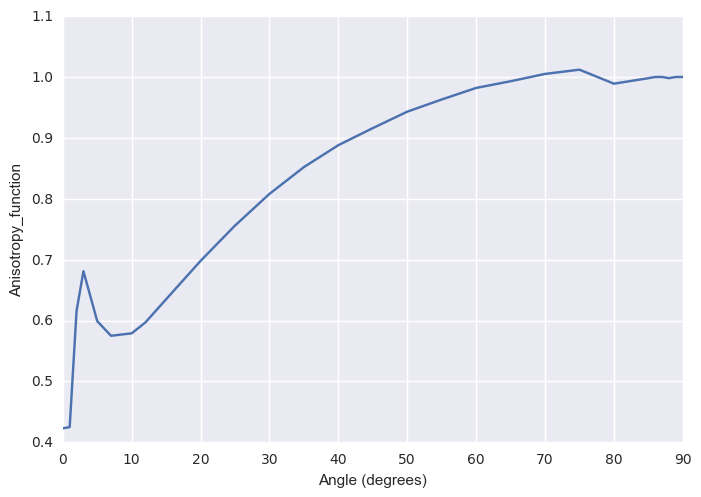

In [12]:
radius_pos = 2
print('At radius of ' + str(data['Anisotropy_function'].index[radius_pos]))
plt.plot(data['Anisotropy_function'].columns.values, data['Anisotropy_function'].iloc[radius_pos].values);
plt.ylabel('Anisotropy_function');
plt.xlabel('Angle (degrees)');

Plot the Anisotropy_function at an angle of 40 degrees from the seed

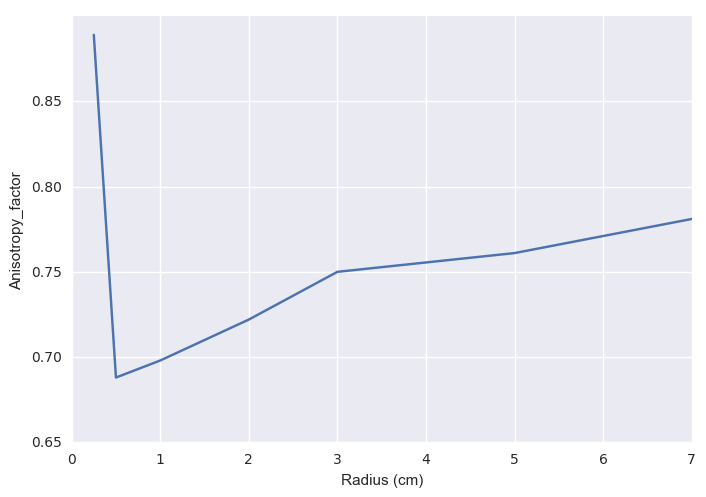

In [13]:
angle = 20
plt.plot(data['Anisotropy_function'][angle]);
plt.xlabel('Radius (cm)')
plt.ylabel('Anisotropy_factor')

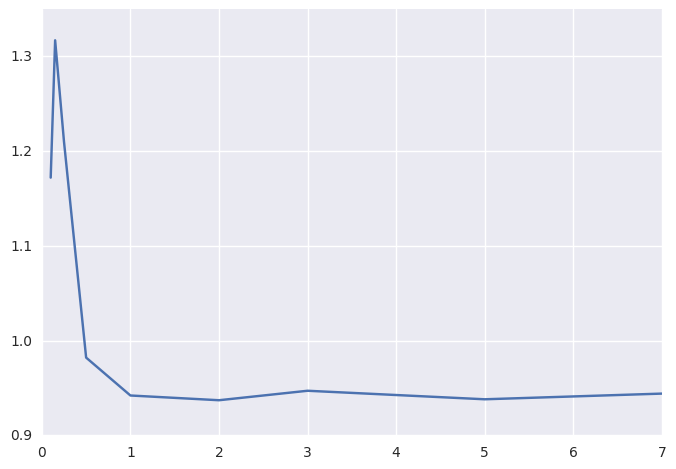

In [21]:
plt.plot(data['Anisotropy_factors'])